In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df_cleaned = pd.read_csv('/Users/meetpatel/Desktop/project_8/processed_data',index_col=0)

In [3]:
df_cleaned


,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,year,month,day,time,title_clean,normalized_salary,year_month
title,,,,,,,,,,,,,,
Experienced Media Buyer For Solar Pannel and Roofing installation companies.,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,Unknown,2024,2,17,09:09:54,experienced media buyer for solar pannel and r...,500.0,2024-02
Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,2024,2,17,09:09:17,full stack developer,1100.0,2024-02
SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States,2024,2,17,09:08:46,smma bubble app,20.0,2024-02
Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,2024,2,17,09:07:42,data engineer,650.0,2024-02
Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,False,NaN,NaN,5.0,India,2024,2,17,09:07:27,want to fix the wordpress plugin,5.0,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Need Facebook advertising experts to launch products,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia,2024,3,24,13:28:38,need facebook advertising experts to launch pr...,60.0,2024-03
Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka,2024,3,24,13:40:52,digital/telemarketing/sales/outside sales,100.0,2024-03
WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States,2024,3,24,13:37:50,wordpress template edits,17.5,2024-03


_____________________________________

## Track changes in job market dynamics over months ##

In [4]:
# Monthly Job Posting Count
monthly_jobs = df_cleaned.groupby('year_month').size().reset_index(name='job_count')

# Top Job Titles per Month
top_titles = df_cleaned.groupby(['year_month', 'title']).size().reset_index(name='count')

# Average Hourly Rates
monthly_rates = df_cleaned.groupby('year_month')[['hourly_low', 'hourly_high']].mean().reset_index()

# Country-wise Hiring Trends
monthly_country = df_cleaned.groupby(['year_month', 'country']).size().reset_index(name='job_count')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


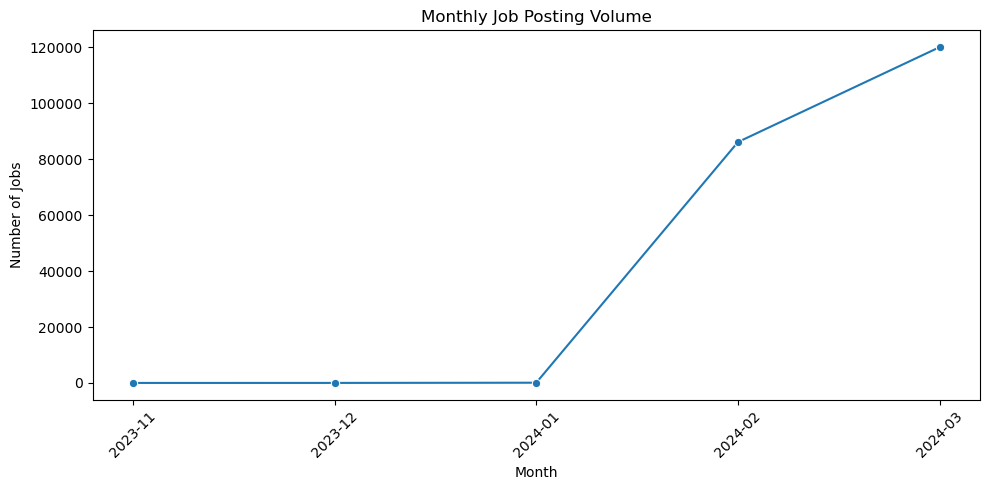

In [5]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_jobs, x='year_month', y='job_count', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Job Posting Volume')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

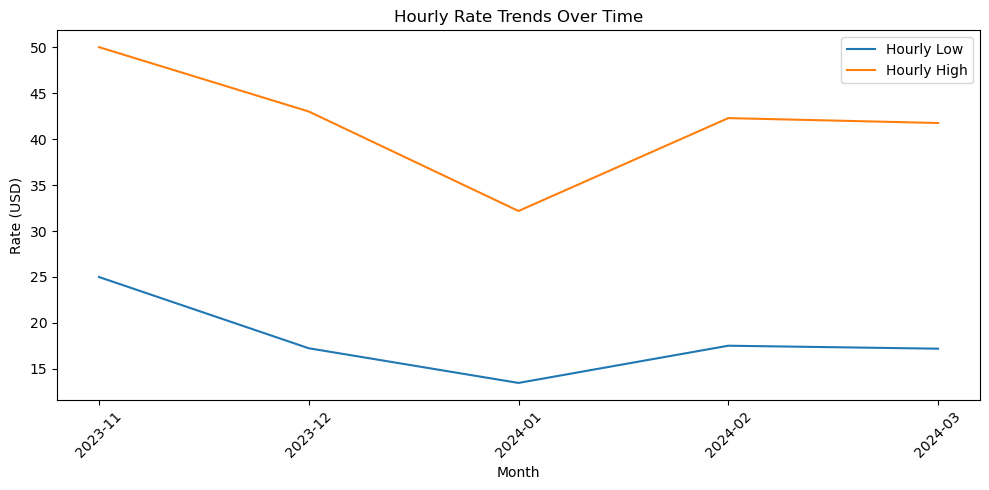

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rates, x='year_month', y='hourly_low', label='Hourly Low')
sns.lineplot(data=monthly_rates, x='year_month', y='hourly_high', label='Hourly High')
plt.xticks(rotation=45)
plt.title('Hourly Rate Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Rate (USD)')
plt.legend()
plt.tight_layout()
plt.show()

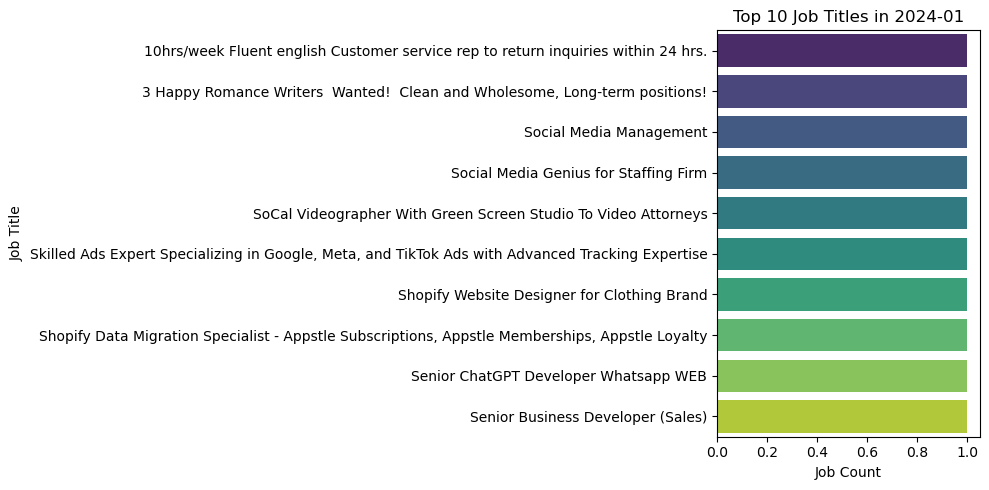

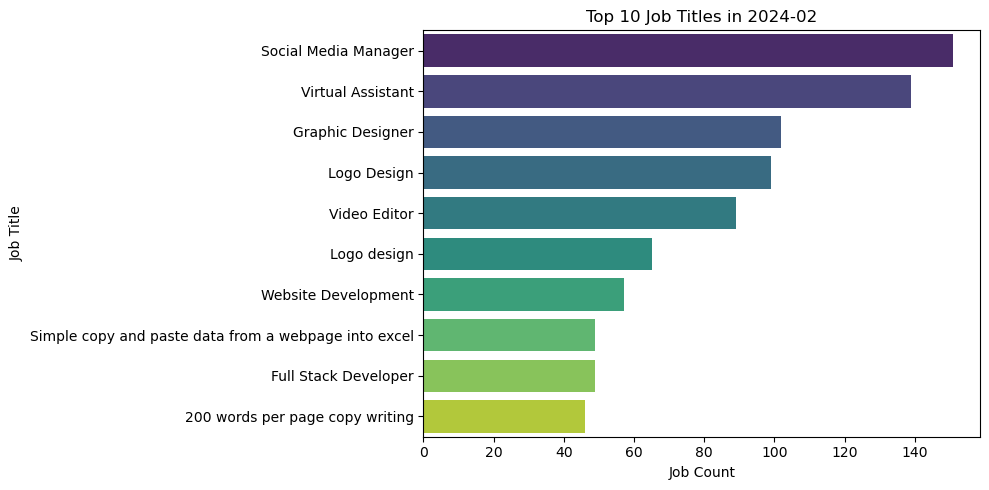

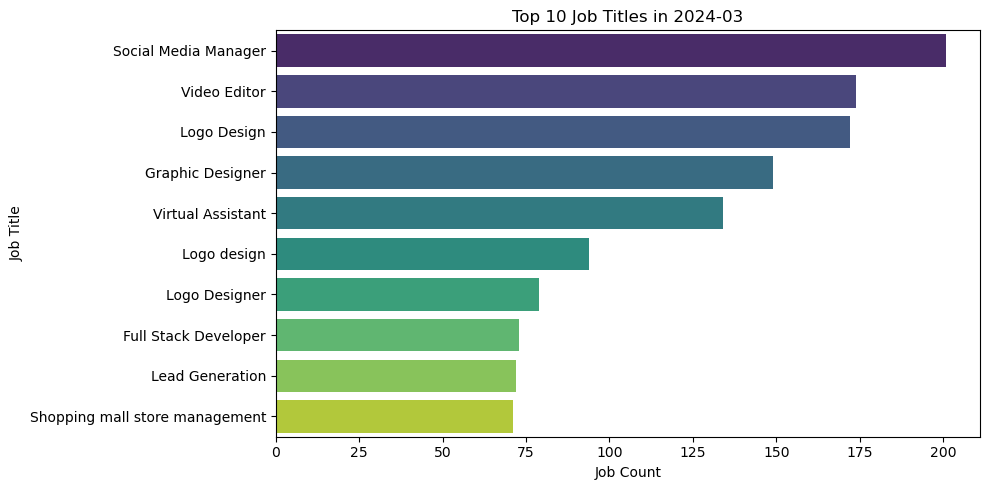

 No job data available for 2024-11
 No job data available for 2024-12


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

months = ['2024-01', '2024-02', '2024-03', '2024-11', '2024-12']

for selected_month in months:
    # Filter data for this month
    top_titles_month = top_titles[top_titles['year_month'] == selected_month]

    if top_titles_month.empty:
        print(f" No job data available for {selected_month}")
        continue

    # Get top 10 titles
    top_titles_month = top_titles_month.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_titles_month, y='title', x='count', palette='viridis')
    plt.title(f'Top 10 Job Titles in {selected_month}')
    plt.xlabel('Job Count')
    plt.ylabel('Job Title')
    plt.tight_layout()
    plt.show()


In [8]:
df_cleaned

,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,year,month,day,time,title_clean,normalized_salary,year_month
title,,,,,,,,,,,,,,
Experienced Media Buyer For Solar Pannel and Roofing installation companies.,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,Unknown,2024,2,17,09:09:54,experienced media buyer for solar pannel and r...,500.0,2024-02
Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,2024,2,17,09:09:17,full stack developer,1100.0,2024-02
SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States,2024,2,17,09:08:46,smma bubble app,20.0,2024-02
Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,2024,2,17,09:07:42,data engineer,650.0,2024-02
Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,False,NaN,NaN,5.0,India,2024,2,17,09:07:27,want to fix the wordpress plugin,5.0,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Need Facebook advertising experts to launch products,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia,2024,3,24,13:28:38,need facebook advertising experts to launch pr...,60.0,2024-03
Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka,2024,3,24,13:40:52,digital/telemarketing/sales/outside sales,100.0,2024-03
WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States,2024,3,24,13:37:50,wordpress template edits,17.5,2024-03


_________________________________________________________

## remote work job ##

In [9]:
if 'remote' not in df_cleaned.columns:
    df_cleaned['remote'] = df_cleaned['title_clean'].str.lower().str.contains("remote|work from home|wfh", na=False)

In [10]:
df_cleaned.head()

,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,year,month,day,time,title_clean,normalized_salary,year_month,remote
title,,,,,,,,,,,,,,,
Experienced Media Buyer For Solar Pannel and Roofing installation companies.,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,Unknown,2024,2,17,09:09:54,experienced media buyer for solar pannel and r...,500.0,2024-02,False
Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,2024,2,17,09:09:17,full stack developer,1100.0,2024-02,False
SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States,2024,2,17,09:08:46,smma bubble app,20.0,2024-02,False
Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,2024,2,17,09:07:42,data engineer,650.0,2024-02,False
Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,False,NaN,NaN,5.0,India,2024,2,17,09:07:27,want to fix the wordpress plugin,5.0,2024-02,False


<Axes: xlabel='remote'>

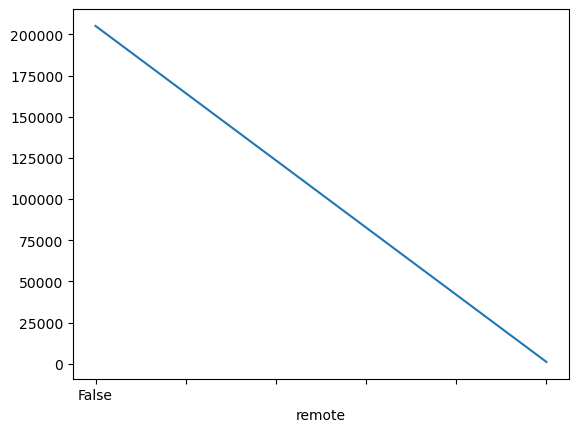

In [11]:
df_cleaned['remote'].value_counts().plot()

In [12]:
remote_trend = df_cleaned.groupby(['year_month', 'remote']).size().unstack(fill_value=0).reset_index()
remote_trend.columns.name = None  # cleanup
remote_trend = remote_trend.rename(columns={False: "on_site", True: "remote"})

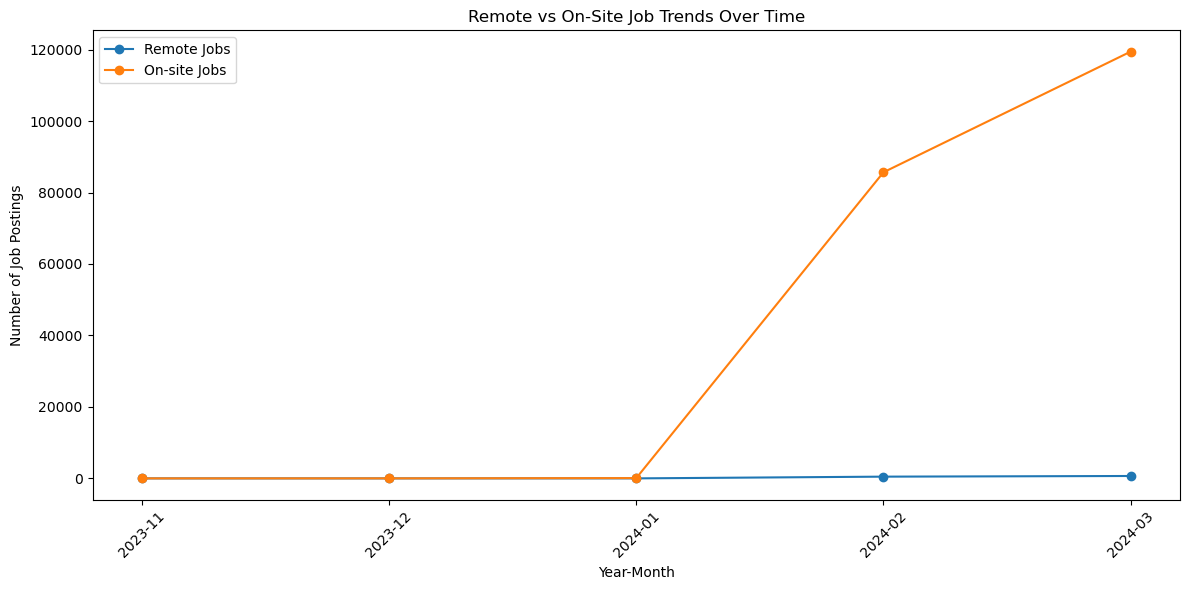

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(remote_trend['year_month'], remote_trend['remote'], label='Remote Jobs', marker='o')
plt.plot(remote_trend['year_month'], remote_trend['on_site'], label='On-site Jobs', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Job Postings')
plt.title('Remote vs On-Site Job Trends Over Time')
plt.legend()
plt.tight_layout()
plt.show()

16:24:26 - cmdstanpy - INFO - Chain [1] start processing
16:24:26 - cmdstanpy - INFO - Chain [1] done processing


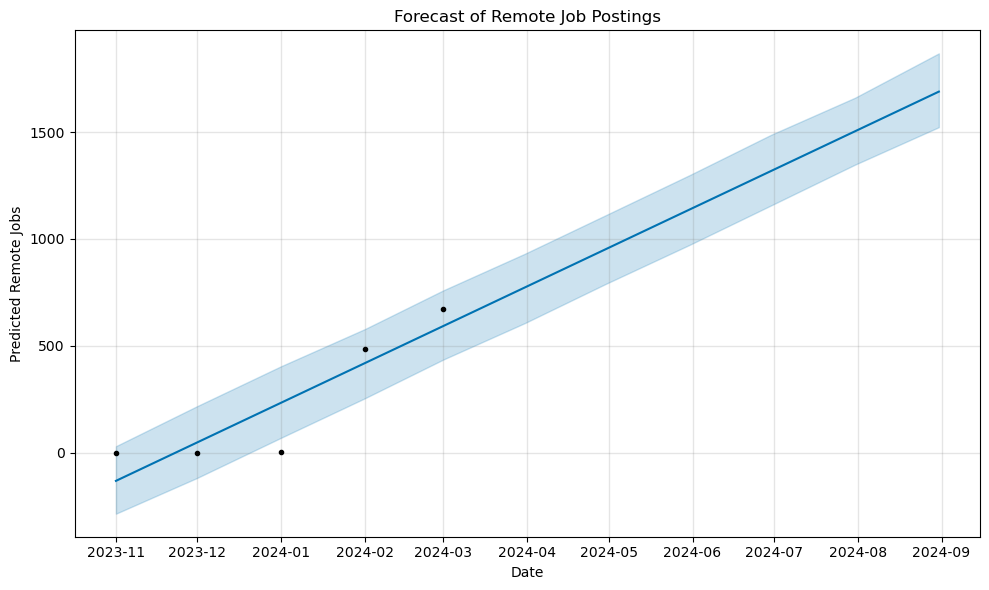

In [14]:
from prophet import Prophet


df_prophet = remote_trend[['year_month', 'remote']].copy()
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Forecast of Remote Job Postings")
plt.xlabel("Date")
plt.ylabel("Predicted Remote Jobs")
plt.tight_layout()
plt.show()


__________________________________________

## Forecast for the next 6 months ##

In [15]:
# Count total jobs per month
monthly_jobs = df_cleaned.groupby('year_month').size().reset_index(name='job_count')
monthly_jobs['ds'] = pd.to_datetime(monthly_jobs['year_month'])  # Prophet expects 'ds' column
monthly_jobs = monthly_jobs[['ds', 'job_count']]
monthly_jobs.columns = ['ds', 'y']

In [16]:
monthly_jobs

,ds,y
0,2023-11-01,1
1,2023-12-01,6
2,2024-01-01,80
3,2024-02-01,86141
4,2024-03-01,120085


In [17]:
model = Prophet()
model.fit(monthly_jobs)

16:24:26 - cmdstanpy - INFO - Chain [1] start processing
16:24:26 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

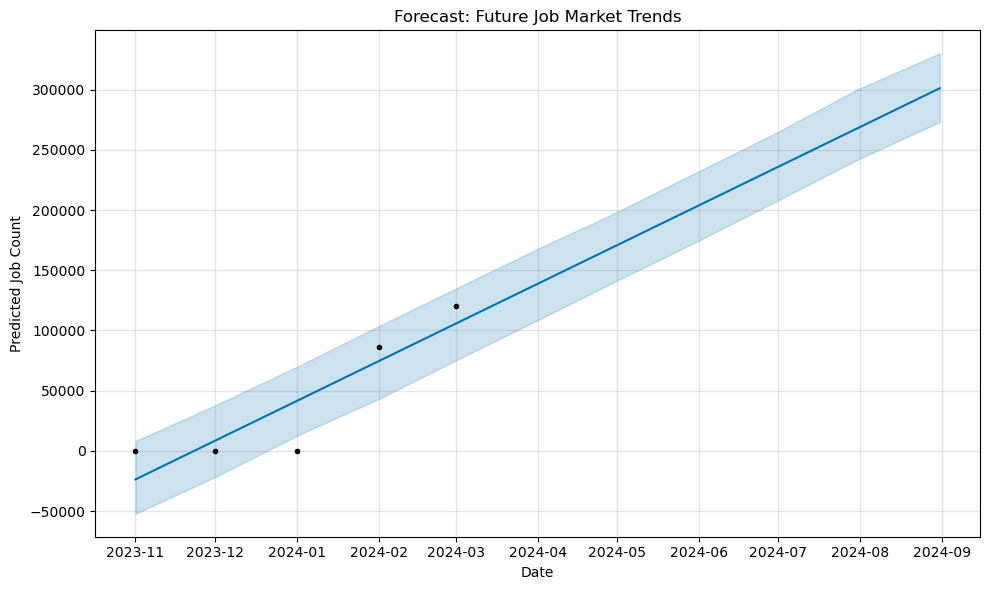

In [19]:
model.plot(forecast)
plt.title('Forecast: Future Job Market Trends')
plt.xlabel('Date')
plt.ylabel('Predicted Job Count')
plt.tight_layout()
plt.show()

In [23]:
forecast.to_csv('/Users/meetpatel/Desktop/project_8/untitled folder.csv',index=False)